In [ ]:
######################## BCB 546X: Python Assignment Details ########################

# ** Your Mission: Complete Python code in a Jupyter Notebook ** #

#-- Functions --#
## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
## 3. Write an alternative translation function.
## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
## 5. Write a function that computes the GC-content of each DNA sequence.

#-- In the MAIN part of the script --#
## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
## 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
#       a. What is the smallest penguin species? 
#       b. What is the geographical range of this species?
## 9. Plot a graph that shows the molecular weight as a function of GC content. 
## 10. Write the entire DataFrame to a new CSV file that includes your new columns.
## 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

#-- Additional Instructions (points will be deducted if these instructions are not heeded) --#
## ** Do all of this in a Jupyter notebook and push it to a GitHub repository.
## ** Your repository should not contain any files other than those associated with this assignment. 
## ** Read all comments carefully and answer the questions by including information in your Jupyter notebook.
## ** Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
## ** Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
## ** Commit and push your completed work in the Jupyter notebook to your repository.
## ** Submit the URL to your git repository via Canvas by the end of the day on May 6, 2022.

#-- Disclaimer --#
## Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.

In [10]:
######################## Python Translate Script ########################

## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## Function `get_sequences_from_file(fasta_fn)`
<b>Description:</b> extracts sequence data from file and organizes it by species name  
<b>Arguments:</b> `fasta_fn`: a fasta file  
<b>Return:</b> the sequence data within `fasta_fn` as a dictionary indexed by species name  
<b>Example:</b>  
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")  
cytb_seqs  
<b>Output:</b>  
{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus magellanicus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')}

In [11]:
def get_sequences_from_file(fasta_fn): # Defines a function that takes a fasta as an argument
    sequence_data_dict = {} # Defines a dictionary to store sequence data
    for record in SeqIO.parse(fasta_fn, "fasta"): #loops through each sequence/description in the fasta file
        description = record.description.split() #splits the discription into individual elements
        species_name = description[1] + " " + description[2] #extracts genus and species
        sequence_data_dict[species_name] = record.seq #assigns sequence data to species name in dictionary
    return(sequence_data_dict) # Returns the dictionary containing sequence data indexed by species name

## Function `translate_function()`
<b>Description:</b> function for translating DNA sequence into corresponding protein sequence. Well stop translation automatically when it encounters a stop codon.   
<b>Arguments:</b> `seq` a string representing a DNA sequence  
<b>Return:</b> `aa_seq_string` string representing the protein sequnce  
<b>Example:</b> translate_function('ATGCCATGGGCTTCG')  
<b>Output:</b> 'MPWAS'

In [12]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########

def translate_function(seq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_seq_string = "" # empty string variable to store amino acids
    for i in range(0,len(seq),3): # steps through every third base in the seq string
        codon = seq[i:i+3] # retrieves the 3 codon bases
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":
            return aa_seq_string # if it's a stop codon, stop translation and return the amino acid sequence
        else:
            aa_seq_string += mito_table.forward_table[codon] # if it's not a stop codon, translate and add the amino acid
    return aa_seq_string

## Function `alt_translate_function()`
<b>Description:</b> Alternative function for translating DNA sequence into corresponding protein sequence that makes use of pre-existing BioPython translate function  
<b>Arguments:</b> `seq` a string representing a DNA sequence  
<b>Return:</b> a string representing the protein sequnce  
<b>Example:</b> alt_translate_function('ATGCCATGGGCTTCG')  
<b>Output:</b> Seq('MPWAS')


In [13]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########

from Bio.Seq import Seq

def alt_translate_function(seq):
    bio_seq = Seq(seq) # defines seq string as a read only sequence object (biopython)
    return bio_seq.translate(table=CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"], to_stop=True) # uses biopython translate method (biopython)
    

## Function `compute_molecular_weight()`
<b>Description:</b> Takes a string representing a protein sequence and returns the molecular weight of the protein sequence. Makes use of biopython function for protein analysis.  
<b>Arguments:</b> `aa_seq` a string representing a protein sequence  
<b>Return:</b> the molecular weight of the protein in Daltons as a float number  
<b>Example:</b> compute_molecular_weight('MPWAS')     
<b>Output:</b> 590.6916

In [14]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########

from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
        # perform protein analysis
        analyzed_protein = ProteinAnalysis(aa_seq)
        
        #return the molecular weight
        return analyzed_protein.molecular_weight() 

## Function `compute_GC_content()`
<b>Description:</b> Takes a string representing a DNA sequence and returns the GC content (proportion of the sequence that is 'G' or 'C') as a proportion  
<b>Arguments:</b> `seq` string representing DNA sequence  
<b>Return:</b> the gc proportion as a float number    
<b>Example:</b> compute_GC_content('ATGCCATGGGCTTCG')  
<b>Output:</b> 0.6

In [15]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########

from Bio.SeqUtils import gc_fraction 

def compute_GC_content(seq):
    return gc_fraction(seq)    

In [16]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [17]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.
penguins_df["molecular_weight"] = float('nan')
penguins_df["GC_content"] = float('nan')

In [18]:
## 7 ##

for species, seq in cytb_seqs.items():
    aa_seq = translate_function(seq) # translate the sequence
    mw_aa_seq = compute_molecular_weight(aa_seq) # compute mw of translated sequence
    GC_content = compute_GC_content(seq) # compute GC content of sequence
    
    # Add the mw and GC values to penguins_df
    penguins_df.loc[penguins_df['species'] == species, ['molecular_weight']] = mw_aa_seq
    penguins_df.loc[penguins_df['species'] == species, ['GC_content']] = GC_content
    
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

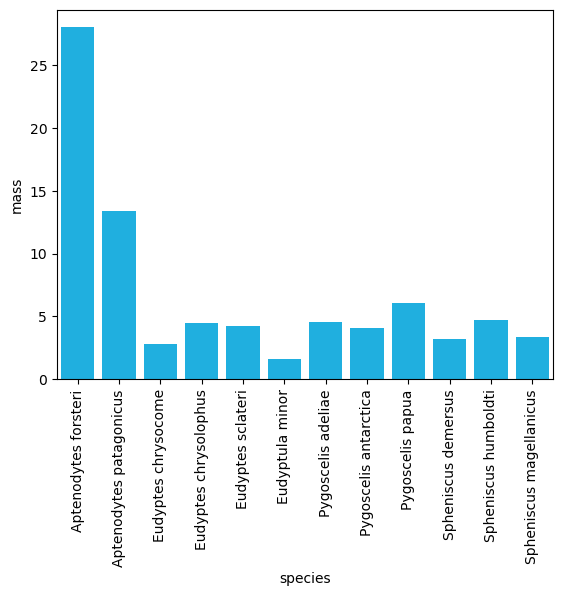

In [19]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

import seaborn as sns
import matplotlib.pylab as plt

# plot bar chart of mass by species 
sns.barplot(x='species', y='mass', data=penguins_df, color='deepskyblue')
plt.xticks(rotation = 90) # rotate labels so they are readable


### Q1: What is the smallest penguin species?
The smallest penguin species is Eudyptula minor
### Q2: What is the geographical range of this species?
This penguin species is typically found on the [southern coast of mainland australia, Tasmania, and in New Zealand](https://australian.museum/learn/animals/birds/little-penguin-eudyptula-minor/)


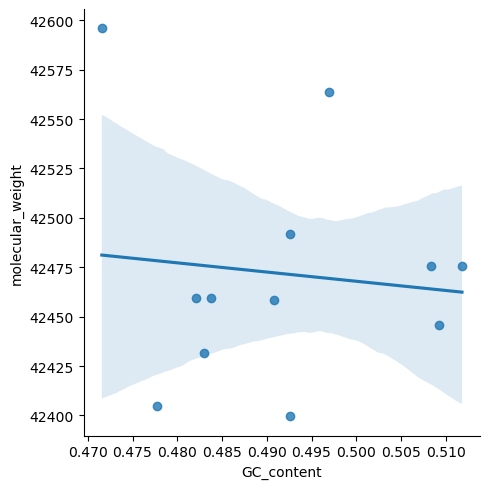

In [20]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
sns.lmplot(x='GC_content',y='molecular_weight',data=penguins_df)

In [21]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

In [ ]:
## 11 - BONUS #
